In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

/home/ashikari/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [32]:
def k_means(image: np.ndarray, k: int, hsv_transform: bool = False, blur_kernel_size = 7):
    if hsv_transform:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        image = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 0)
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)
    
    #the below line of code defines the criteria for the algorithm to stop running, 
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    
    # then perform k-means clustering with number of clusters defined as 3
    #also random centers are initially choosed for k-means clustering
    retval, labels, centers = cv2.kmeans(pixels,
                                         k,
                                         None,
                                         criteria,
                                         10,
                                         cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    print(centers.shape)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    if hsv_transform:
        segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)
    return segmented_image, labels

def process_label_image(image, size=3):
    kernel = np.ones((size, size),np.uint8)
    out = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    out = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel)
    return out


def show_images(label_images, seg_images, k, cols = 1,):
    rows = (k+1) // cols
    if (k+1) % cols:
        rows += 1
    fig, axes = plt.subplots(rows, cols, figsize=(40, 40))
    
    for img_idx, img in enumerate(label_images):
        if cols > 1:
            row = img_idx // cols
            col = img_idx % cols
            axes[row][col].imshow(img)
            
        else:
            axes[img_idx].imshow(img)
    
    if cols > 1:
        axes[(img_idx + 1)// cols][(img_idx + 1)% cols].imshow(seg_image)
    else:
        axes[img_idx + 1].imshow(seg_image)

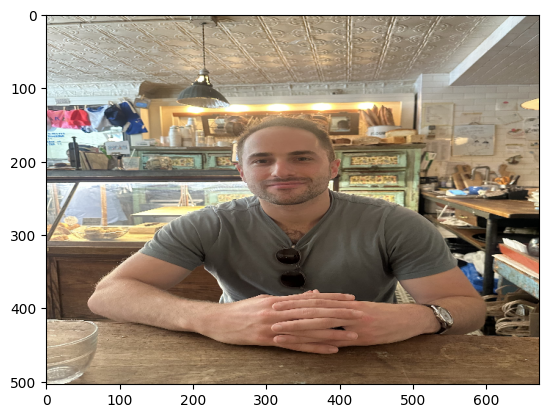

In [38]:
file = "/home/ashikari/Downloads/pretty_water.jpeg"
file = "/home/ashikari/Downloads/james.jpg"
# file = "/home/ashikari/Downloads/rafting.jpeg"
image = cv2.imread(file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale = 1/6
image = cv2.resize(image, (int(image.shape[0] * scale ), int(image.shape[1] * scale)))
plt.imshow(image)
plt.show()

In [45]:
k = 25
seg_image, labels = k_means(image, k=k, hsv_transform=True)

label_images = []
processed_label_images = []
for i in range(k):
    label_image = np.zeros(image.shape[:2] + (1,))
    label_image[labels.reshape(image.shape[:2]) == i] = 255
    label_images.append(label_image)

    processed_label_images.append(process_label_image(label_image))

(25, 3)


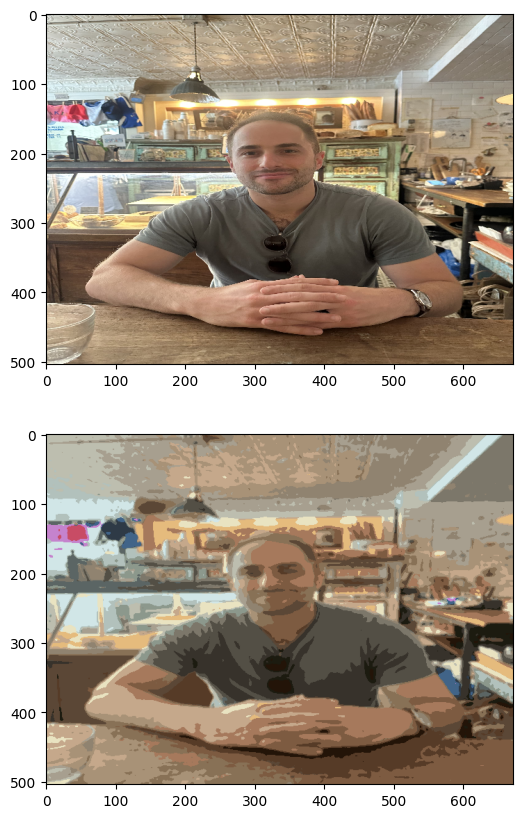

In [46]:
fig, axes = plt.subplots(2, figsize=(10, 10))
axes[0].imshow(image)
axes[1].imshow(seg_image)

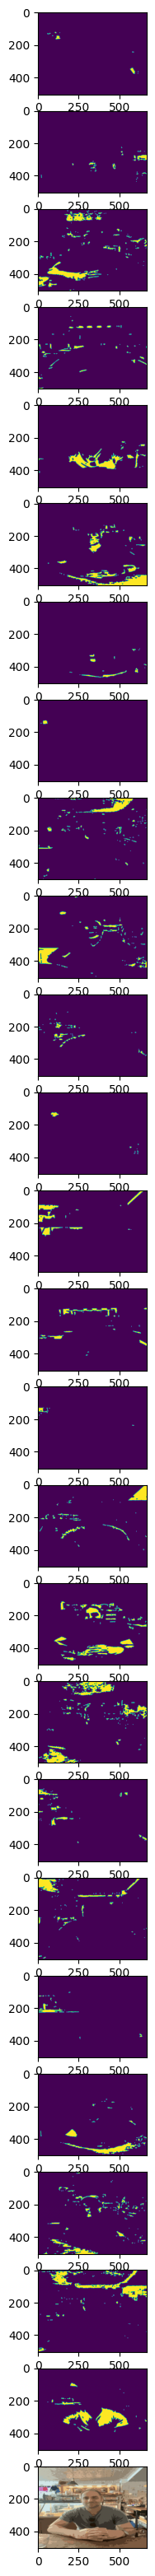

In [47]:
show_images(processed_label_images, seg_image, k)

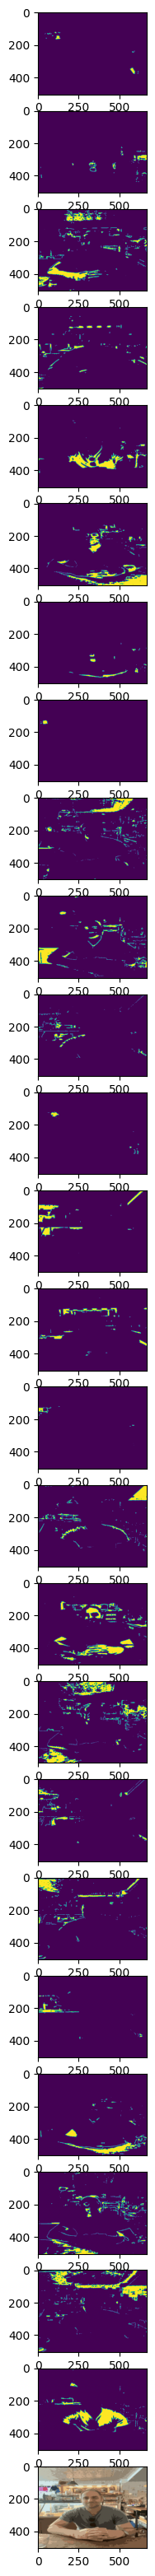

In [48]:
show_images(label_images, seg_image, k)

In [ ]:
edges = cv2.Canny(image=seg_image, threshold1 = 1, threshold2 = 1)

In [ ]:
plt.imshow(255 - edges, cmap="gray")

In [ ]:
plt.imshow(edges)

In [ ]:
type(image)

In [ ]:
plt.imshow(label_images[1])

In [ ]:
l_image = cv2.resize(label_images[0], (label_images[0].shape[0] * 2, label_images[0].shape[1] * 2))
plt.imshow(l_image)

In [ ]:

plt.imshow(out)

In [ ]:
out = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)
out = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel)
plt.imshow(out)

In [ ]:
from skimage.morphology import skeletonize

In [ ]:
out2 = skeletonize(out)
plt.imshow(out2)

In [ ]:
ret, thresh = cv2.threshold(255* out2.astype(np.float32), 127, 255, 0)
contours, heirarchy = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
len(contours)

In [ ]:
contours

In [ ]:
c_img = np.zeros(out2.shape)
for i in range(len(contours)):
    intensity = int(i / len(contours) * 255)
    c_img = cv2.drawContours(c_img, contours, i, (intensity, intensity, intensity), 3)
plt.imshow(c_img)